In [1]:
import face_recognition

image_path = 'images/1.jpg'
image = face_recognition.load_image_file(image_path)
print(image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ..., 
 [[175 188 255]
  [175 189 254]
  [175 189 252]
  ..., 
  [177 188 242]
  [177 186 241]
  [176 185 240]]

 [[176 189 255]
  [176 189 255]
  [178 189 255]
  ..., 
  [178 187 246]
  [177 186 245]
  [176 185 244]]

 [[178 188 255]
  [178 188 255]
  [178 188 255]
  ..., 
  [182 190 252]
  [182 190 252]
  [181 189 251]]]


照片共辨識出 1 張臉。


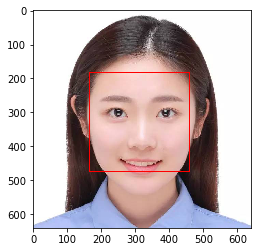

In [2]:
import face_recognition
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

image_path = 'images/1.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=1, model="cnn")
print("照片共辨識出 {} 張臉。".format(len(face_locations)))

# 將 numpy array 格式的影像物件轉換為 PIL 影像處理物件的影像格式
pil_image = Image.fromarray(image)
draw      = ImageDraw.Draw(pil_image)

# 逐一繪製人臉識別的結果
for face_location in face_locations:
    top, right, bottom, left = face_location
    pos = (left, top, right, bottom)
    
    # 繪製人臉識別區域(寬度=3，顏色=RED)
    line_border = 3
    for i in range(line_border):
        draw.rectangle(pos, outline="red")  
        pos = (pos[0]+1,pos[1]+1, pos[2]+1,pos[3]+1)
        
# 開啟影像物件
# pil_image.show()

# 使用matplotlib開啟圖片
plt.imshow(pil_image)
plt.show()

臉部特徵(chin)座標點：[(157, 286), (160, 330), (169, 372), (177, 413), (192, 451), (216, 484), (246, 513), (280, 536), (318, 544), (355, 538), (389, 516), (419, 488), (443, 453), (457, 415), (467, 374), (475, 332), (478, 288)]
臉部特徵(left_eyebrow)座標點：[(188, 270), (210, 254), (240, 250), (270, 253), (297, 265)]
臉部特徵(right_eyebrow)座標點：[(343, 265), (370, 252), (400, 250), (428, 255), (449, 272)]
臉部特徵(nose_bridge)座標點：[(320, 303), (320, 332), (321, 361), (321, 390)]
臉部特徵(nose_tip)座標點：[(288, 407), (304, 412), (319, 416), (335, 412), (350, 408)]
臉部特徵(left_eye)座標點：[(220, 303), (238, 292), (259, 294), (276, 311), (257, 313), (236, 312)]
臉部特徵(right_eye)座標點：[(363, 312), (380, 295), (401, 293), (418, 305), (404, 313), (383, 315)]
臉部特徵(top_lip)座標點：[(253, 442), (279, 437), (303, 434), (318, 438), (334, 435), (357, 439), (381, 444), (373, 447), (334, 446), (318, 447), (302, 444), (262, 444)]
臉部特徵(bottom_lip)座標點：[(381, 444), (358, 472), (335, 482), (317, 484), (300, 481), (277, 469), (253, 442), (262, 444), (30

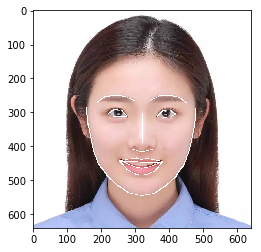

In [3]:
import face_recognition
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

image_path = 'images/1.jpg'
image      = face_recognition.load_image_file(image_path)
face_locations  = face_recognition.face_locations(image, number_of_times_to_upsample=1, model="cnn")
image_landmarks = face_recognition.face_landmarks(image, face_locations=face_locations)

for face_landmarks in image_landmarks:
    # 模型使用之九組臉部特徵
    facial_features = ['chin',             # 下巴
                       'left_eyebrow',     # 左眉毛
                       'right_eyebrow',    # 右眉毛
                       'nose_bridge',      # 鼻樑
                       'nose_tip',         # 鼻尖
                       'left_eye',         # 左眼
                       'right_eye',        # 右眼
                       'top_lip',          # 上嘴唇
                       'bottom_lip']       # 下嘴唇
    
    # 列印出九組臉部特徵在影像中識別出的座標點
    for facial_feature in facial_features:
        print("臉部特徵({})座標點：{}".format(facial_feature, face_landmarks[facial_feature]))
    
    # 在原影像中繪製出九組臉部特徵在(白色線條)
    pil_image = Image.fromarray(image)
    d = ImageDraw.Draw(pil_image)
    for facial_feature in facial_features:
        d.line(face_landmarks[facial_feature], fill="WHITE", width=3)
        
    plt.imshow(pil_image)
    plt.show()